### A company has customer data that contains 8 columns of customer details and another table having name customer_policy data contains the policy details of the customer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### objective: The company intends to offer some discount in premium for certain customers. To do that they ask their Data scientist team to get some information

## 1.Preparing the data

In [2]:
customer_data=pd.read_csv("customer_details.csv")
customer_policy_data=pd.read_csv("customer_policy_details.csv")

* Naming the data columns to improve the readability of the dataset

In [3]:
customer_data.rename({'0':'Customer_id','1':'Gender','2':'Age','3':'Driving_licence_present','4':'Region_code',
                      '5':'Previously_insured', 
                       '6':'Vehicle_age','7':'Vehicle_damage'},axis=1,inplace=True)
customer_data

,Customer_id,Gender,Age,Driving_licence_present,Region_code,Previously_insured,Vehicle_age,Vehicle_damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [4]:
columns=['Driving_licence_present','Previously_insured']

for col in columns:
    customer_data[col].astype(object,copy=True)
    customer_data[col].replace(1,"Yes",inplace=True)
    customer_data[col].replace(0,"No",inplace=True)
customer_data

,Customer_id,Gender,Age,Driving_licence_present,Region_code,Previously_insured,Vehicle_age,Vehicle_damage
0,1.0,Male,44.0,Yes,28.0,No,> 2 Years,Yes
1,2.0,Male,76.0,Yes,3.0,No,1-2 Year,No
2,3.0,Male,47.0,Yes,28.0,No,> 2 Years,Yes
3,4.0,Male,21.0,Yes,11.0,Yes,< 1 Year,No
4,5.0,Female,29.0,Yes,41.0,Yes,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,Yes,26.0,Yes,1-2 Year,No
381105,381106.0,Male,30.0,Yes,37.0,Yes,< 1 Year,No
381106,381107.0,Male,21.0,Yes,30.0,Yes,< 1 Year,No
381107,381108.0,Female,68.0,Yes,14.0,No,> 2 Years,Yes


In [5]:
customer_policy_data.rename({'0':'Customer_id','1':'Annual_premium_in_Rs','2':'Sales_channel_code','3':'Vintage','4':'Response'},
                   axis=1,inplace=True)
customer_policy_data

,Customer_id,Annual_premium_in_Rs,Sales_channel_code,Vintage,Response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [6]:
customer_policy_data["Response"].astype(object,copy=True)

0         1.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
381104    0.0
381105    0.0
381106    0.0
381107    0.0
381108    0.0
Name: Response, Length: 381109, dtype: object

In [7]:
customer_policy_data["Response"].replace(1.0,"Yes",inplace=True)
customer_policy_data["Response"].replace(0.0,"No",inplace=True)

In [8]:
customer_policy_data

,Customer_id,Annual_premium_in_Rs,Sales_channel_code,Vintage,Response
0,1.0,40454.0,26.0,217.0,Yes
1,2.0,33536.0,26.0,183.0,No
2,3.0,38294.0,26.0,27.0,Yes
3,4.0,28619.0,152.0,203.0,No
4,5.0,27496.0,152.0,39.0,No
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,No
381105,381106.0,40016.0,152.0,131.0,No
381106,381107.0,35118.0,160.0,161.0,No
381107,381108.0,44617.0,124.0,74.0,No


In [9]:
customer_data.shape 

(381109, 8)

In [10]:
customer_policy_data.shape

(381109, 5)

In [11]:
customer_data.describe()

,Customer_id,Age,Region_code
count,380723.000000,380741.000000,380717.000000
mean,190548.776244,38.822827,26.388575
std,110016.805160,15.512120,13.230361
min,1.000000,20.000000,0.000000
25%,95269.500000,25.000000,15.000000
50%,190543.000000,36.000000,28.000000
75%,285822.500000,49.000000,35.000000
max,381109.000000,85.000000,52.000000


In [12]:
customer_policy_data.describe()

,Customer_id,Annual_premium_in_Rs,Sales_channel_code,Vintage
count,380722.000000,380763.000000,380709.000000,380721.000000
mean,190547.491663,30563.700273,112.035752,154.342437
std,110013.824148,17200.257877,54.204942,83.669600
min,1.000000,2630.000000,1.000000,10.000000
25%,95276.250000,24406.000000,29.000000,82.000000
50%,190536.500000,31668.000000,133.000000,154.000000
75%,285818.750000,39400.000000,152.000000,227.000000
max,381109.000000,540165.000000,163.000000,299.000000


In [13]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_id              380723 non-null  float64
 1   Gender                   380741 non-null  object 
 2   Age                      380741 non-null  float64
 3   Driving_licence_present  380716 non-null  object 
 4   Region_code              380717 non-null  float64
 5   Previously_insured       380728 non-null  object 
 6   Vehicle_age              380728 non-null  object 
 7   Vehicle_damage           380702 non-null  object 
dtypes: float64(3), object(5)
memory usage: 23.3+ MB


In [19]:
customer_policy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Customer_id           380722 non-null  float64
 1   Annual_premium_in_Rs  380763 non-null  float64
 2   Sales_channel_code    380709 non-null  float64
 3   Vintage               380721 non-null  float64
 4   Response              380748 non-null  object 
dtypes: float64(4), object(1)
memory usage: 14.5+ MB


## 2.Processing and cleaning 

### Checking and dealing with null values 

In [20]:
customer_data.isnull().sum()

Customer_id                386
Gender                     368
Age                        368
Driving_licence_present    393
Region_code                392
Previously_insured         381
Vehicle_age                381
Vehicle_damage             407
dtype: int64

In [21]:
customer_policy_data.isnull().sum()

Customer_id             387
Annual_premium_in_Rs    346
Sales_channel_code      400
Vintage                 388
Response                361
dtype: int64

###### Dropping Null values for customer_id because central tendencies for id’s is not feasible.

In [14]:
customer_data.dropna(subset=['Customer_id'],inplace=True)
customer_policy_data.dropna(subset=['Customer_id'],inplace=True)

In [25]:
customer_data.isna().sum()

Customer_id                  0
Gender                     368
Age                        366
Driving_licence_present    392
Region_code                391
Previously_insured         381
Vehicle_age                381
Vehicle_damage             406
dtype: int64

In [23]:
customer_data.shape

(380723, 8)

In [24]:
customer_policy_data.shape

(380722, 5)

###### Replacing all null values for numeric columns by mean. 
###### Replacing all null values for Categorical value by mode.

In [16]:
for i in customer_data.columns:
    if customer_data[i].dtype=="object":
        customer_data[i]=customer_data[i].fillna(customer_data[i].mode()[0])
    else:
        customer_data[i]=customer_data[i].fillna(customer_data[i].mean()) 
    
        

In [30]:
customer_data.isna().sum()

Customer_id                0
Gender                     0
Age                        0
Driving_licence_present    0
Region_code                0
Previously_insured         0
Vehicle_age                0
Vehicle_damage             0
dtype: int64

In [17]:
for i in customer_policy_data.columns:
    if customer_policy_data[i].dtype=="object":
        customer_policy_data[i]=customer_policy_data[i].fillna(customer_policy_data[i].mode()[0])
    else:
        customer_policy_data[i]=customer_policy_data[i].fillna(customer_policy_data[i].mean()) 
    

In [32]:
customer_policy_data.isna().sum()

Customer_id             0
Annual_premium_in_Rs    0
Sales_channel_code      0
Vintage                 0
Response                0
dtype: int64

### Dealing with outliers

In [18]:
Q1=customer_data.quantile(0.25)
Q3=customer_data.quantile(0.75)
IQR=Q3-Q1
below=Q1-(1.5*IQR)
above=Q3+(1.5*IQR)
outliers=((customer_data<below)|(customer_data>above)).sum()
outliers

C:\Users\saroj\AppData\Local\Temp/ipykernel_5092/1825105135.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=((customer_data<below)|(customer_data>above)).sum()


Age                        0
Customer_id                0
Driving_licence_present    0
Gender                     0
Previously_insured         0
Region_code                0
Vehicle_age                0
Vehicle_damage             0
dtype: int64

In [19]:
Q1=customer_policy_data.quantile(0.25)
Q3=customer_policy_data.quantile(0.75)
IQR=Q3-Q1
below=Q1-(1.5*IQR)
above=Q3+(1.5*IQR)
outliers=((customer_policy_data<below)|(customer_policy_data>above)).sum()
outliers

C:\Users\saroj\AppData\Local\Temp/ipykernel_5092/4152090020.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=((customer_policy_data<below)|(customer_policy_data>above)).sum()


Annual_premium_in_Rs    10332
Customer_id                 0
Response                    0
Sales_channel_code          0
Vintage                     0
dtype: int64

<AxesSubplot:xlabel='Annual_premium_in_Rs'>

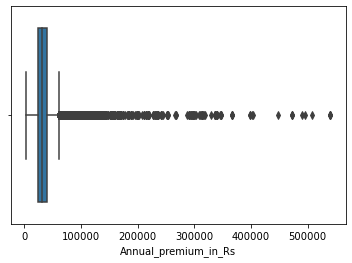

In [20]:
sb.boxplot(x=customer_policy_data['Annual_premium_in_Rs'])

In [21]:
def replace_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = customer_policy_data.copy()
    outliers = df_out[col_name].between(fence_low, fence_high)
    df_out.loc[outliers, col_name] = df_out.loc[~outliers,col_name].mean()
    return df_out

In [22]:
new_policy_data=replace_outlier(customer_policy_data,'Annual_premium_in_Rs')

In [23]:
new_policy_data

,Customer_id,Annual_premium_in_Rs,Sales_channel_code,Vintage,Response
0,1.0,77159.58072,26.0,217.0,Yes
1,2.0,77159.58072,26.0,183.0,No
2,3.0,77159.58072,26.0,27.0,Yes
3,4.0,77159.58072,152.0,203.0,No
4,5.0,77159.58072,152.0,39.0,No
...,...,...,...,...,...
381104,381105.0,77159.58072,26.0,88.0,No
381105,381106.0,77159.58072,152.0,131.0,No
381106,381107.0,77159.58072,160.0,161.0,No
381107,381108.0,77159.58072,124.0,74.0,No


In [24]:
customer_data=customer_data.apply(lambda x :x.str.strip() if x.dtype=="object" else x)

In [25]:
customer_data=customer_data.apply(lambda x:x.str.upper() if x.dtype=="object" else x)

In [26]:
customer_data

,Customer_id,Gender,Age,Driving_licence_present,Region_code,Previously_insured,Vehicle_age,Vehicle_damage
0,1.0,MALE,44.0,YES,28.0,NO,> 2 YEARS,YES
1,2.0,MALE,76.0,YES,3.0,NO,1-2 YEAR,NO
2,3.0,MALE,47.0,YES,28.0,NO,> 2 YEARS,YES
3,4.0,MALE,21.0,YES,11.0,YES,< 1 YEAR,NO
4,5.0,FEMALE,29.0,YES,41.0,YES,< 1 YEAR,NO
...,...,...,...,...,...,...,...,...
381104,381105.0,MALE,74.0,YES,26.0,YES,1-2 YEAR,NO
381105,381106.0,MALE,30.0,YES,37.0,YES,< 1 YEAR,NO
381106,381107.0,MALE,21.0,YES,30.0,YES,< 1 YEAR,NO
381107,381108.0,FEMALE,68.0,YES,14.0,NO,> 2 YEARS,YES


### Dealing with duplicates 

In [27]:
customer_data.drop_duplicates()
new_policy_data.drop_duplicates()

,Customer_id,Annual_premium_in_Rs,Sales_channel_code,Vintage,Response
0,1.0,77159.58072,26.0,217.0,Yes
1,2.0,77159.58072,26.0,183.0,No
2,3.0,77159.58072,26.0,27.0,Yes
3,4.0,77159.58072,152.0,203.0,No
4,5.0,77159.58072,152.0,39.0,No
...,...,...,...,...,...
381104,381105.0,77159.58072,26.0,88.0,No
381105,381106.0,77159.58072,152.0,131.0,No
381106,381107.0,77159.58072,160.0,161.0,No
381107,381108.0,77159.58072,124.0,74.0,No


In [28]:
Master_table=pd.merge(customer_data,new_policy_data,on="Customer_id")
Master_table

,Customer_id,Gender,Age,Driving_licence_present,Region_code,Previously_insured,Vehicle_age,Vehicle_damage,Annual_premium_in_Rs,Sales_channel_code,Vintage,Response
0,1.0,MALE,44.0,YES,28.0,NO,> 2 YEARS,YES,77159.58072,26.0,217.0,Yes
1,2.0,MALE,76.0,YES,3.0,NO,1-2 YEAR,NO,77159.58072,26.0,183.0,No
2,3.0,MALE,47.0,YES,28.0,NO,> 2 YEARS,YES,77159.58072,26.0,27.0,Yes
3,4.0,MALE,21.0,YES,11.0,YES,< 1 YEAR,NO,77159.58072,152.0,203.0,No
4,5.0,FEMALE,29.0,YES,41.0,YES,< 1 YEAR,NO,77159.58072,152.0,39.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,MALE,74.0,YES,26.0,YES,1-2 YEAR,NO,77159.58072,26.0,88.0,No
380332,381106.0,MALE,30.0,YES,37.0,YES,< 1 YEAR,NO,77159.58072,152.0,131.0,No
380333,381107.0,MALE,21.0,YES,30.0,YES,< 1 YEAR,NO,77159.58072,160.0,161.0,No
380334,381108.0,FEMALE,68.0,YES,14.0,NO,> 2 YEARS,YES,77159.58072,124.0,74.0,No


## 3.Analyzing the data

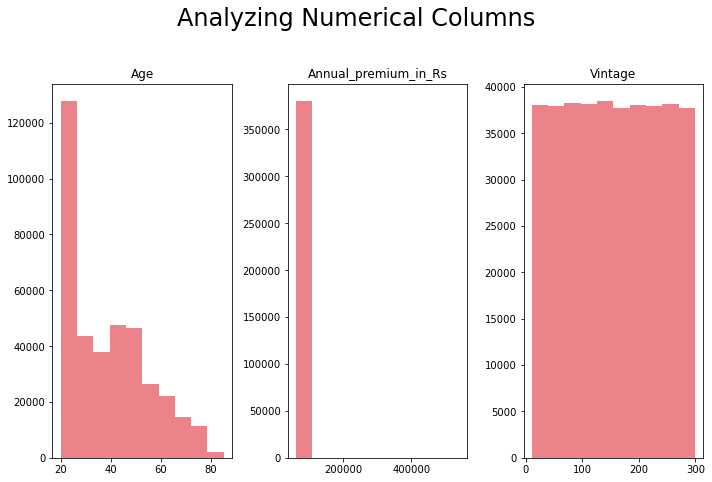

In [65]:
data=Master_table[['Age','Annual_premium_in_Rs','Vintage']]
fig = plt.figure(figsize=(10,7))
plt.suptitle('Analyzing Numerical Columns',horizontalalignment="center",fontstyle = "normal", fontsize = 24)
for i in range(data.shape[1]):
    plt.subplot(1,3 , i + 1)
    f = plt.gca()
    f.set_title(data.columns.values[i])
    plt.hist(data.iloc[:, i], color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

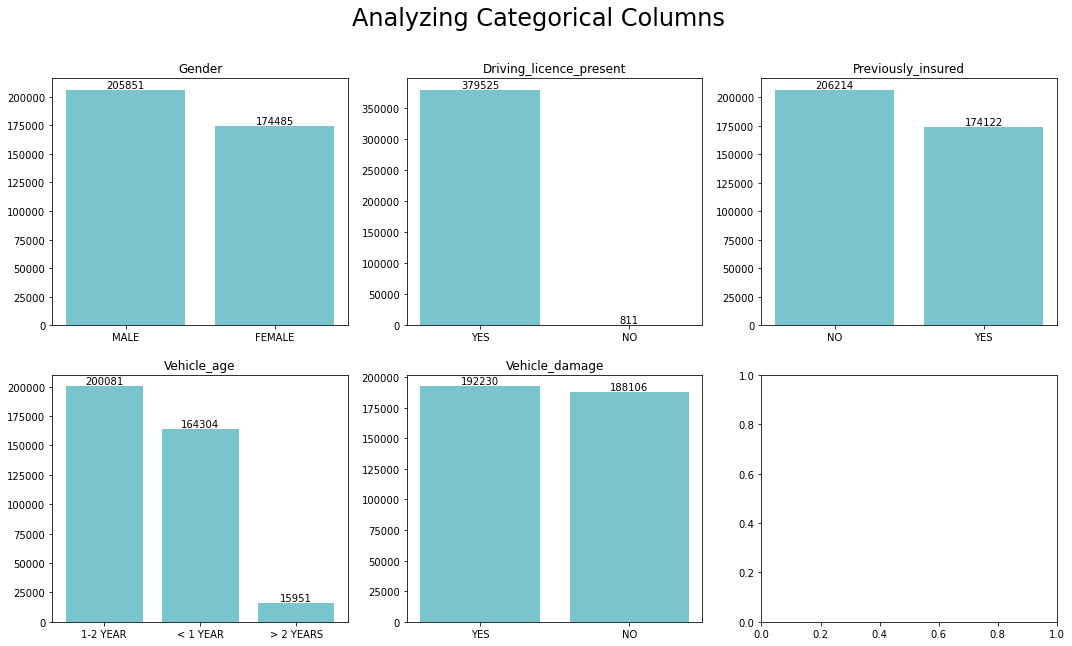

In [70]:

df=Master_table[['Gender','Driving_licence_present',"Previously_insured",'Vehicle_age','Vehicle_damage']]
# List of columns to create bar charts for
columns_to_plot = ['Gender', 'Driving_licence_present', 'Previously_insured', 'Vehicle_age', 'Vehicle_damage']

# Create subplots for each column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
#fig.tight_layout(pad=4.0)
plt.suptitle('Analyzing Categorical Columns',horizontalalignment="center",fontstyle = "normal", fontsize = 24)
# Iterate through columns and create bar charts with value labels
for i, col in enumerate(columns_to_plot):
    ax = axes[i // 3, i % 3]
    value_counts = df[col].value_counts()
    ax.bar(value_counts.index, value_counts.values, color='#7AC5CD')
    ax.set_title(col)
    
    # Add value labels to the bars
    for x, y in zip(value_counts.index, value_counts.values):
        ax.text(x, y, str(y), ha='center', va='bottom')

# Show the subplots
plt.show()


* Observations:
  * Male customers are taking vehicle insurence more than female 

## Finding the relation between variables

<AxesSubplot:>

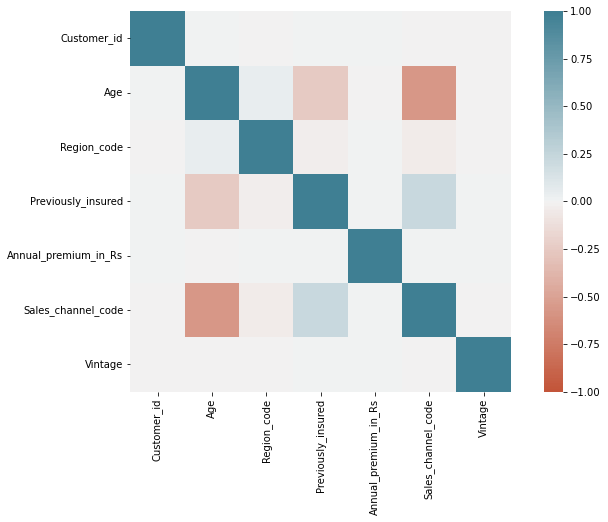

In [49]:
import seaborn as sns
corr = Master_table.corr()
plt.figure(figsize=(12,7))
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

### 1. Finding the average annual premium of  gender

In [31]:
data=Master_table.groupby(['Gender'])["Annual_premium_in_Rs"].mean()
data

Gender
FEMALE    77164.676374
MALE      77153.574269
Name: Annual_premium_in_Rs, dtype: float64

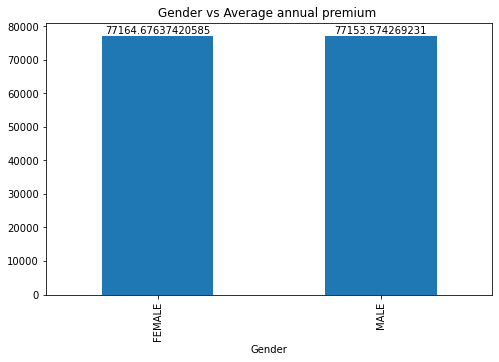

In [32]:
plt.figure(figsize=(8,5))
ax=data.plot.bar(title="Gender vs Average annual premium ")
for i, v in enumerate(data):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

* Observations
  * although female customers lower than male customers
  * Both female and male paying equal average annual premium

### 2.Finding relationship between age and annual premium with respect to vehicle_age

C:\Users\saroj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


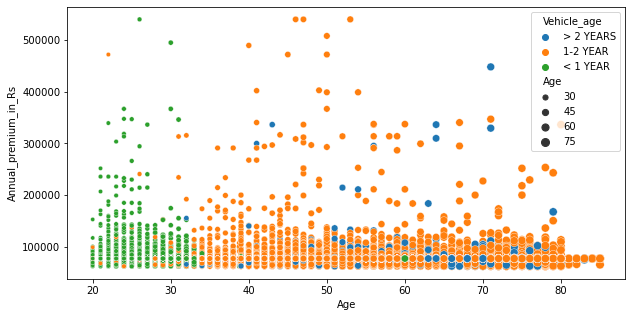

In [39]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=Master_table,x="Age",y="Annual_premium_in_Rs",hue="Vehicle_age",size="Age")
plt.show()

* Observations
  * The Vehicle_age <1 year are the customers in the age between 20 to 33
  * The vehicle_age 1-2 year are the customers in the age 34 to 80+ ,customers between 40 to 55 are paying high
    annual_premium than others

### 3. Finding the  average annual_premium by age

In [37]:
data1=Master_table.groupby(['Age'])["Annual_premium_in_Rs"].mean()
data1

Age
20.0    77127.449507
21.0    77143.242579
22.0    77162.438899
23.0    77150.955286
24.0    77213.332071
            ...     
81.0    76577.049610
82.0    76777.629661
83.0    77058.508869
84.0    77159.580720
85.0    76078.527927
Name: Annual_premium_in_Rs, Length: 67, dtype: float64

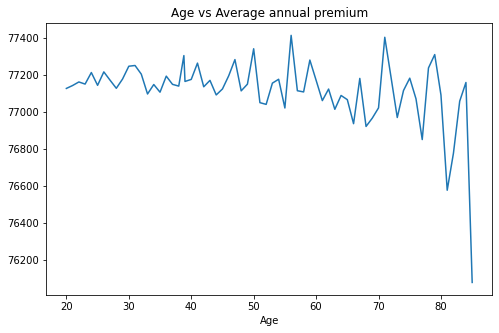

In [38]:
plt.figure(figsize=(8,5))
data1.plot(title="Age vs Average annual premium")
plt.show()

* Observations
   * The older customers are having high average annual premium 

### 4.Finding how many vehicles are damaged after they take the insurence

In [57]:
data4=Master_table.groupby('Vehicle_age')["Vehicle_damage"].value_counts()
data4

Vehicle_age  Vehicle_damage
1-2 YEAR     YES               128102
             NO                 71979
< 1 YEAR     NO                116112
             YES                48192
> 2 YEARS    YES                15936
             NO                    15
Name: Vehicle_damage, dtype: int64

<AxesSubplot:xlabel='Vehicle_age,Vehicle_damage'>

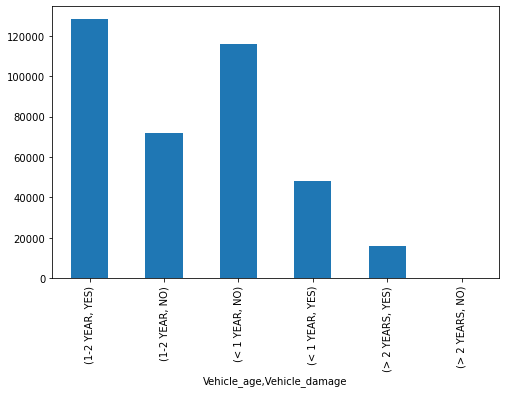

In [59]:
plt.figure(figsize=(8,5))
data4.plot.bar()

* Observations
  * The vehicle-age between 1-2 years of the vehicles are highly damaging 


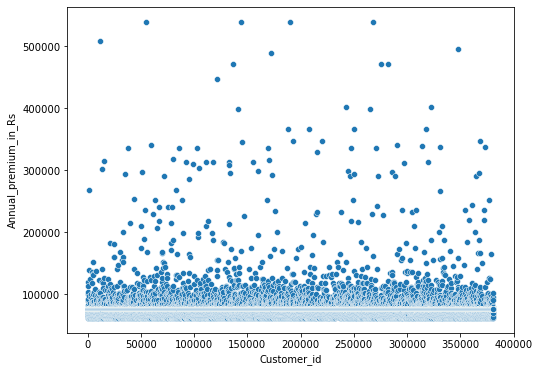

In [44]:
plt.figure(figsize=(8,6))
sb.scatterplot(data=Master_table,x='Customer_id',y='Annual_premium_in_Rs')
plt.show()